In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, exp, factorial

Define a class for the harmonic oscillator

In [23]:
class QuantumHarmonicOscillator:
    """
    This models a harmonic oscillator. Parameters used throughout the methods
    are:
    
    nu: The level of the harmonic oscillator
    k: The force constant
    m: The mass
    
    The nomenclature of variable names follows Atkins and de Paula Physical
    Chemistry 8th ed.
    """
    
    def __init__(self, mass, k):
        """
        Setup the values used by all methods in this model.
        
        Parameters
        ----------
        mass: float
            The reduced mass of the system, in kg
        
        k: float
            The force constant, in N/m
        """
        self.hbar = 1.054571817e-34
        self.k = k
        self.mass = mass
        self.omega = sqrt(k / mass)
    
    def hermite(self, nu, gamma):
        """
        Returns the value of the nu-th (nth) Hermite polynomial evaluated on gamma
        
        The nu and gamma notation follows Atkins' Physical Chemistry 8th ed.
        
        Parameters
        ----------
        nu: int
            The nu-th (nth) Hermite polynomial
            
        gamma: float
            The value to calculate with the Hermite polynomial
            
        Returns
        -------
        float
            The value of the nu-th Hermite polynomial evaluated with gamma.
            
        Raises
        ------
        Exception
            Raises an exception if the nth Hermite polynomial is not
            supported.
        """
        if nu == 0:
            return 1
        elif nu == 1:
            return 2 * gamma
        elif nu == 2:
            return 4 * gamma ** 2 - 2
        elif nu == 3:
            return 8 * gamma ** 3 - 12 * gamma
        elif nu == 4:
            return 16 * gamma ** 4 - 48 * gamma ** 2 + 12
        elif nu == 5:
            return 32 * gamma ** 5 - 160 * gamma ** 3 + 120 * gamma
        elif nu == 6:
            return 64 * gamma ** 6 - 480 * gamma ** 4 + 720 * gamma ** 2 - 120
        else:
            raise Exception(f'Hermite polynomial {n} is not supported')
    
    def energy(self, nu):
        """
        Calculate the energy at the given level nu of the system
        
        Parameters
        ----------
        nu: int
            The quantum number nu for the energy level of this system
            
        Returns
        -------
        float
            Energy of the system in Joules.
        """
        return (nu + 0.5) * self.hbar * self.omega
    
    def energy_sepration(self):
        """
        Returns
        -------
        float
            The energy difference between adjacent energy levels in Joules.
        """
        return self.hbar * self.omega
    
    def wavefunction(self, nu, x):
        """
        Returns the value of the wavefunction at energy level nu
        at coordinate x.
        
        Parameters
        ----------
        nu: float
            Energy level of the system.
            
        x: float
            x coordinate of the particle in m.
            
        Returns
        -------
        float
            Value of the wavefunction nu at x.
        """
        alpha = (self.hbar ** 2 / self.mass / self.k) ** 0.25
        gamma = x / alpha
        normalization = sqrt(1 / (alpha * sqrt(pi) * 2 ** nu * factorial(nu)))
        gaussian = exp((-gamma ** 2) / 2)
        hermite = self.hermite(nu, gamma)
        return normalization * hermite * gaussian

Plot some wavefunctions given the 1H35Cl molecule properties.

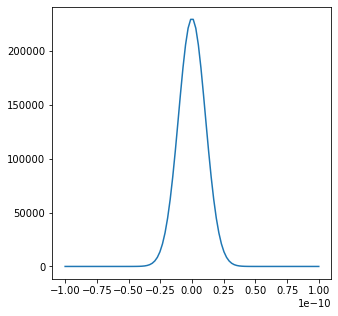

In [28]:
k = 516.3
mass = 1.7e-27
qho = QuantumHarmonicOscillator(k=k, mass=mass)
xs = np.linspace(-1e-10, 1e-10, 100)
ys = [qho.wavefunction(0, x) for x in xs]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(xs, ys)